## Understand Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data
data = pd.read_csv("alzheimers_disease_data.csv")
data.shape

(2149, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
data.nunique() # Number of unique values can help in determining which features are numerical which ones are categorical features.

PatientID                    2149
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation

In [9]:
# Check for duplicate rows and missing values
print("Duplicate rows: ", sum(data.duplicated()))
print(data.isnull().sum())

Duplicate rows:  0
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompleting

## Initial Data Exploration Summary

- The dataset contains a total of 2,149 observations.
- All values are non-null & numerical.
- There are no duplicate records or missing values.
- 

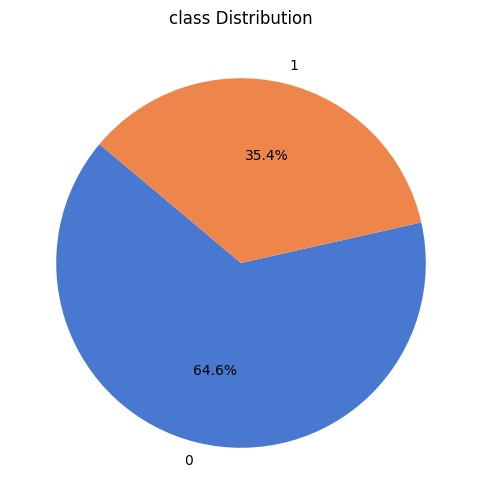

In [11]:
# Define the Response categories and count occurances
categories = [0, 1]
counts = data.Diagnosis.value_counts().tolist()

# Color palette
colors = sns.color_palette("muted")

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('class Distribution')
plt.show()

In [13]:
# data.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)
data.shape

(2149, 33)

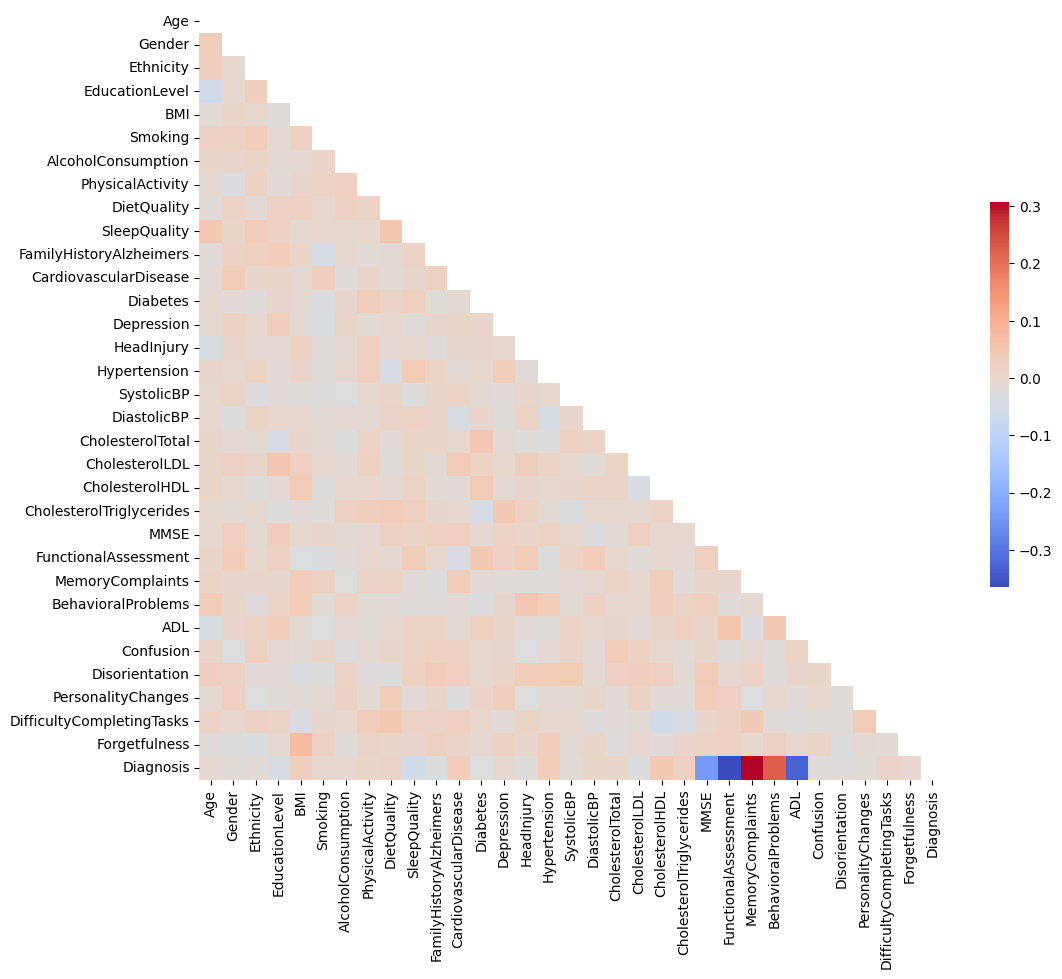

In [15]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

In [27]:
x = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

## VFI

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif["Features"] = x.columns

# check the values
vif

,vif,Features
0,49.397118,Age
1,2.042367,Gender
2,1.505122,Ethnicity
3,3.018612,EducationLevel
4,14.824008,BMI
5,1.420356,Smoking
6,3.993296,AlcoholConsumption
7,3.953335,PhysicalActivity
8,3.964210,DietQuality
9,16.430629,SleepQuality


## Spearman correlation

Feature: Age, Spearman Correlation: -0.01, P-value: 0.7906
Feature: Gender, Spearman Correlation: -0.02, P-value: 0.3311
Feature: Ethnicity, Spearman Correlation: -0.02, P-value: 0.4110
Feature: EducationLevel, Spearman Correlation: -0.04, P-value: 0.0446
Feature: BMI, Spearman Correlation: 0.03, P-value: 0.2212
Feature: Smoking, Spearman Correlation: -0.00, P-value: 0.8217
Feature: AlcoholConsumption, Spearman Correlation: -0.01, P-value: 0.6893
Feature: PhysicalActivity, Spearman Correlation: 0.01, P-value: 0.7858
Feature: DietQuality, Spearman Correlation: 0.01, P-value: 0.6879
Feature: SleepQuality, Spearman Correlation: -0.06, P-value: 0.0093
Feature: FamilyHistoryAlzheimers, Spearman Correlation: -0.03, P-value: 0.1273
Feature: CardiovascularDisease, Spearman Correlation: 0.03, P-value: 0.1445
Feature: Diabetes, Spearman Correlation: -0.03, P-value: 0.1443
Feature: Depression, Spearman Correlation: -0.01, P-value: 0.7848
Feature: HeadInjury, Spearman Correlation: -0.02, P-value: 

C:\Users\chapp\AppData\Local\Temp\ipykernel_16580\1480063354.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spearman_df, x='Spearman_Correlation', y='Feature', orient='h', palette='coolwarm')


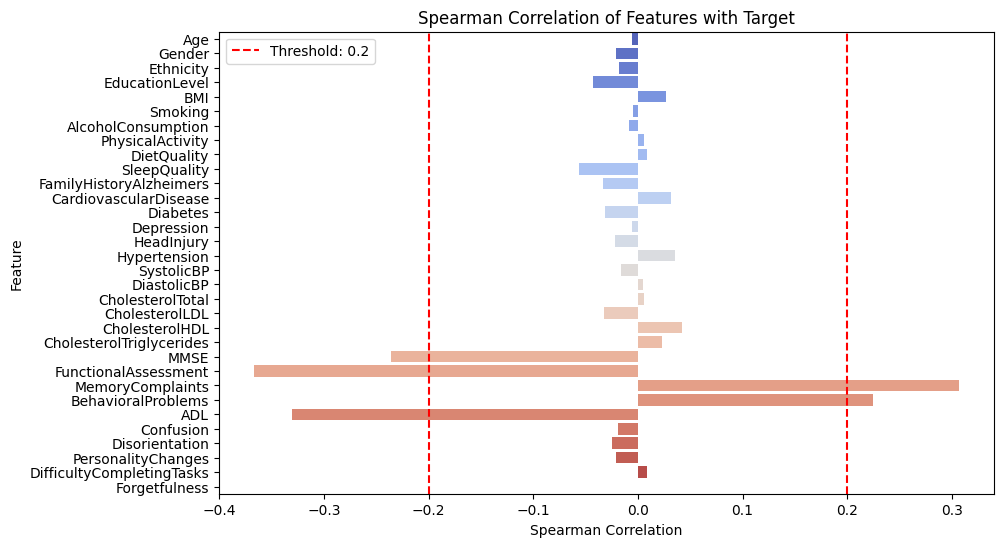

In [29]:
from scipy.stats import spearmanr

# Calculate Spearman correlation for each feature
selected_features = []
spearman_results = []

for col in x.columns:
    rho, p_value = spearmanr(x[col], y)  # Compute Spearman's correlation
    spearman_results.append((col, rho, p_value))
    print(f"Feature: {col}, Spearman Correlation: {rho:.2f}, P-value: {p_value:.4f}")
    
    # Select features based on a threshold
    if abs(rho) > 0.2 and p_value < 0.05:
        selected_features.append(col)

# Print the selected features
print("Selected Features:", selected_features)

# Convert results to a DataFrame for better visualization
spearman_df = pd.DataFrame(spearman_results, columns=['Feature', 'Spearman_Correlation', 'P_value'])

# Plot Spearman correlation for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=spearman_df, x='Spearman_Correlation', y='Feature', orient='h', palette='coolwarm')
plt.axvline(0.2, color='red', linestyle='--', label='Threshold: 0.2')
plt.axvline(-0.2, color='red', linestyle='--')
plt.title('Spearman Correlation of Features with Target')
plt.xlabel('Spearman Correlation')
plt.ylabel('Feature')
plt.legend()
plt.show()
